### 12월 14일 (수)
- 파이썬 기반의 머신러닝 이해와 실습 : Dataset and Samples, Dataset Splitting, Data Preprocessing, Underfitting vs Overfitting
- 커리큘럼을 딱히 따라갈것 같지 않군요... 

### review

- Decision tree
    - root node에서 어떤 descriptive feature를 선택하는 지가 중요.
    - internal node에서도 entropy를 이용해서 information gain 이용하여 선택
    - leaf node가 비어있으면 위쪽 parent node로 올라가서 다수(majority)를 차지하는 class 선택

### ID3 algorithm
- top down greedy approach
- recursive: 반복적으로 분류
- Depth first partitioning
- for categorical features & clean data

*참고*: 
- noise 고려: pruning(가지치기)
- 깊이가 깊어짐에 따라, 노이즈 하나만 클래스에 들어가는 것을 방지하기 위해 깊이, 한계치를 설정.

#### 데이터 분류 방법의 선택
- 데이터의 경향성을 파악하려면? 현재의 Matrics가 적합하지 않을 수 있음. 
- 단순하게 모든 데이터를 분류하는 것이 목적인지?

### Information gain ratio
- Information gain의 한계점
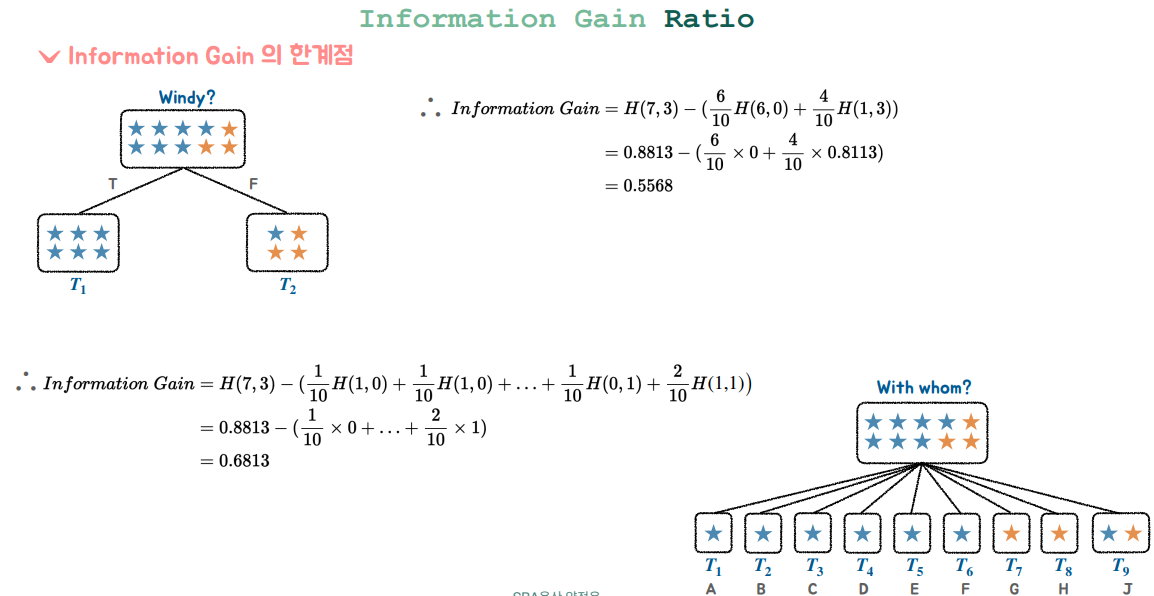
- descriptive feature가 다른 decision tree 비교
    - 아래쪽 decision tree가 IG 더 높음. 
    - 그러나 실제 분류가 잘 되어있다고 보여지는지?
- data set마다 metric을 다르게 써야하는 이유. 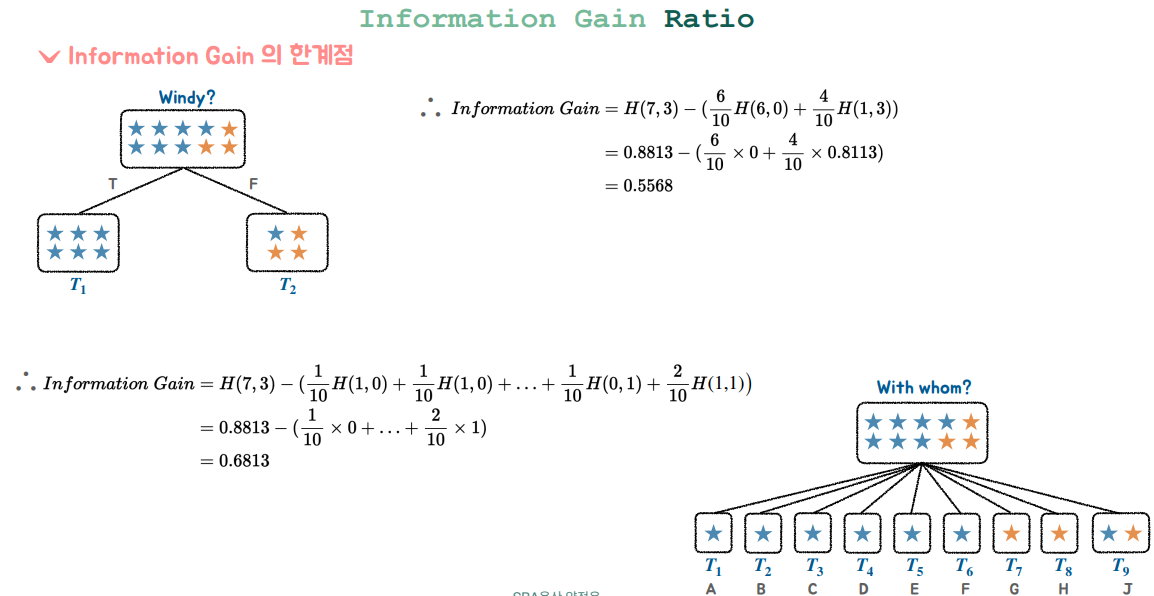

#### information gain ratio 식
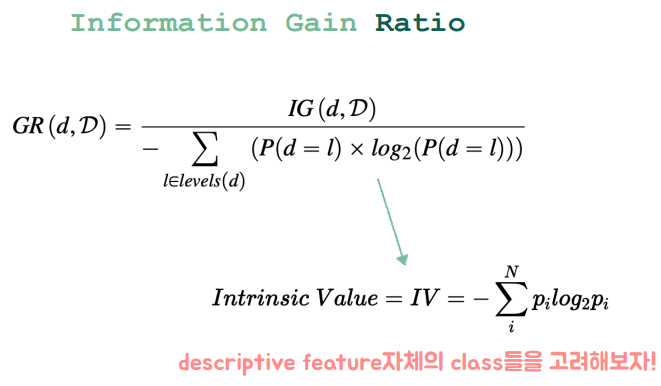
- 분자: information gain
- 분모: Entropy 식. Descriptive feature 자체의 class로 Entropy 계산 
    - feature의 특징을 나타낼 수 있는 entropy
    - 각 feature class의 entropy
    - 원래 가지고 있는 descriptive feature의 class가 많으면 잘 분류된 것 처럼 보일수 있음. 

In [1]:
import numpy as np

In [5]:
H=-(7/10*np.log2(7/10))-3/10*np.log2(3/10)

In [6]:
Ht1=0

In [7]:
Ht2=-(1/4*np.log2(1/4))-3/4*np.log2(3/4)

In [19]:
IG=H-Ht1-Ht2*(4/10)

In [11]:
Ht9=1*(2/10)

In [20]:
IG2=H-Ht9

#### Information Gain Ratio 계산하기.
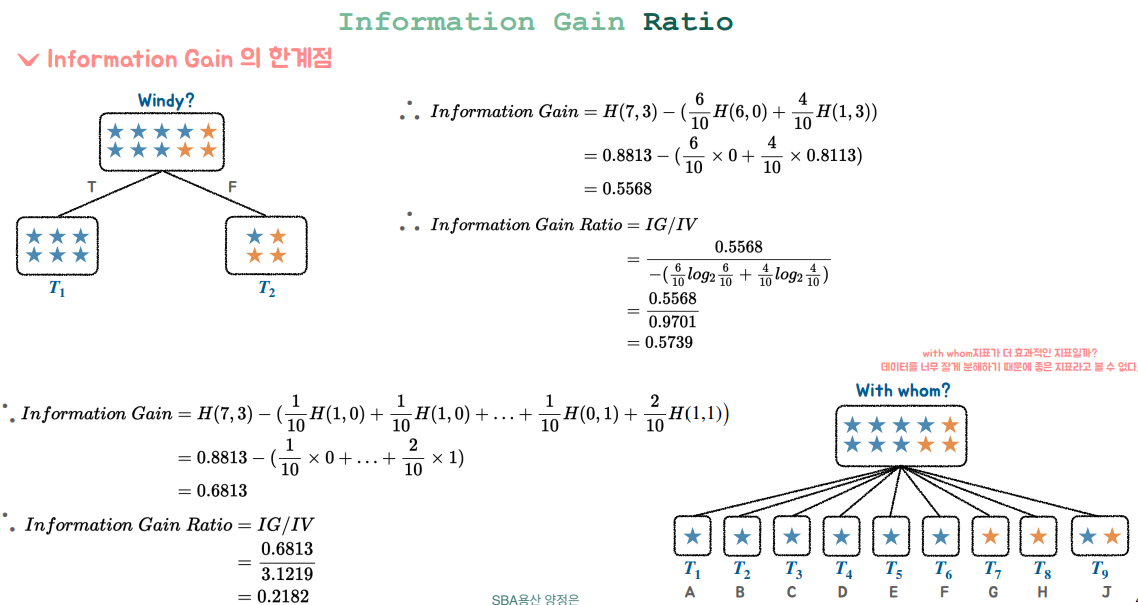
- 더 높은 값을 가지는 것: 위의 decision tree
- 어떤 Metric을 사용하느냐에 따라 순위가 바뀜. 

Information gain
- computationally less expensive
- 컴퓨터 계산량이 적음
- 구하기는 상대적으로 쉽지만, descriptive feature의 분류가 너무 다양한 경우는 적합하지 않음. 
- 이런 경우 information gain ratio를 이용해야 한다. 

In [25]:
#Windy의 Entropy
IV=-(6/10*np.log2(6/10))-4/10*np.log2(4/10)
IV

0.9709505944546686

In [22]:
IG/IV

0.5734376729639402

In [26]:
#With whom의 Entropy
IV2=-(1/10*np.log2(1/10))*8-2/10*np.log2(2/10)
IV2

3.1219280948873624

In [24]:
IG2/IV2

0.21822760759493834

#### Information gain ratio로 decision tree 그리기
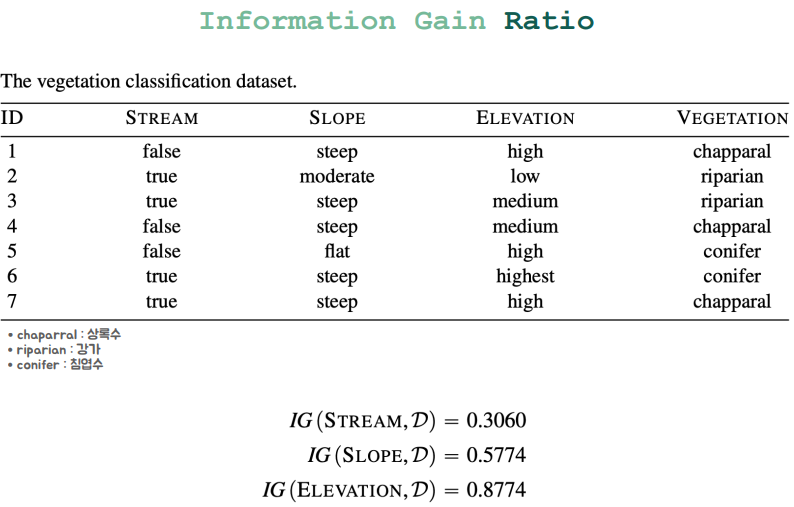

In [38]:
# stream의 entropy
IVst=-(3/7*np.log2(3/7))-(4/7*np.log2(4/7))

IGst=0.3060

IGst/IVst

0.3105879631409165

In [41]:
# slope의 entropy
IVsl=-(5/7*np.log2(5/7))-(1/7*np.log2(1/7))-(1/7*np.log2(1/7))
IGsl=0.5774

IGsl/IVsl

0.5025961719810534

In [44]:
# Elevation의 entropy
IVel=-(3/7*np.log2(3/7))-(1/7*np.log2(1/7))-(1/7*np.log2(1/7))-(2/7*np.log2(2/7))
IGel=0.8774

IGel/IVel

0.4762341587276906

In [58]:
#분기 이후 전체 Entropy
H=-(3/5*np.log2(3/5))-(1/5*np.log2(1/5))*2
H

1.3709505944546687

In [56]:
# 분기 이후 stream entropy
IVst=-(2/5*np.log2(2/5))-(3/5*np.log2(3/5))

In [63]:
Hst=-(1/3*np.log2(1/3))*3
IGst=H-Hst*3/5
IGst/IVst

0.4325380677663127

In [57]:
# 분기 이후 elevation entropy
IVel=-(2/5*np.log2(2/5))*2-(1/5*np.log2(1/5))

In [61]:
Hel=1
IGel=H-Hel*2/5
IGel/IVel

0.6379740263133317

- 어떤 Matric을 사용하느냐에 따라 완성된 Decision tree의 모습 다름.
- Tree의 모양이 바뀌므로 결과도 달라짐.
- Dataset의 특징마다 Matric이 달라져야 함. (현재 상황에서는 뭐가 맞다고 단정지을 수 없음)
- 현재까지 배운 Matric
    - Entropy
    - Information gain
    - Information gain ratio

### Gini Index

- Diversity를 판단하는 matric
- Impurity matric
- 면적을 계산: 같은 것이 뽑히지 않은 확률의 면적
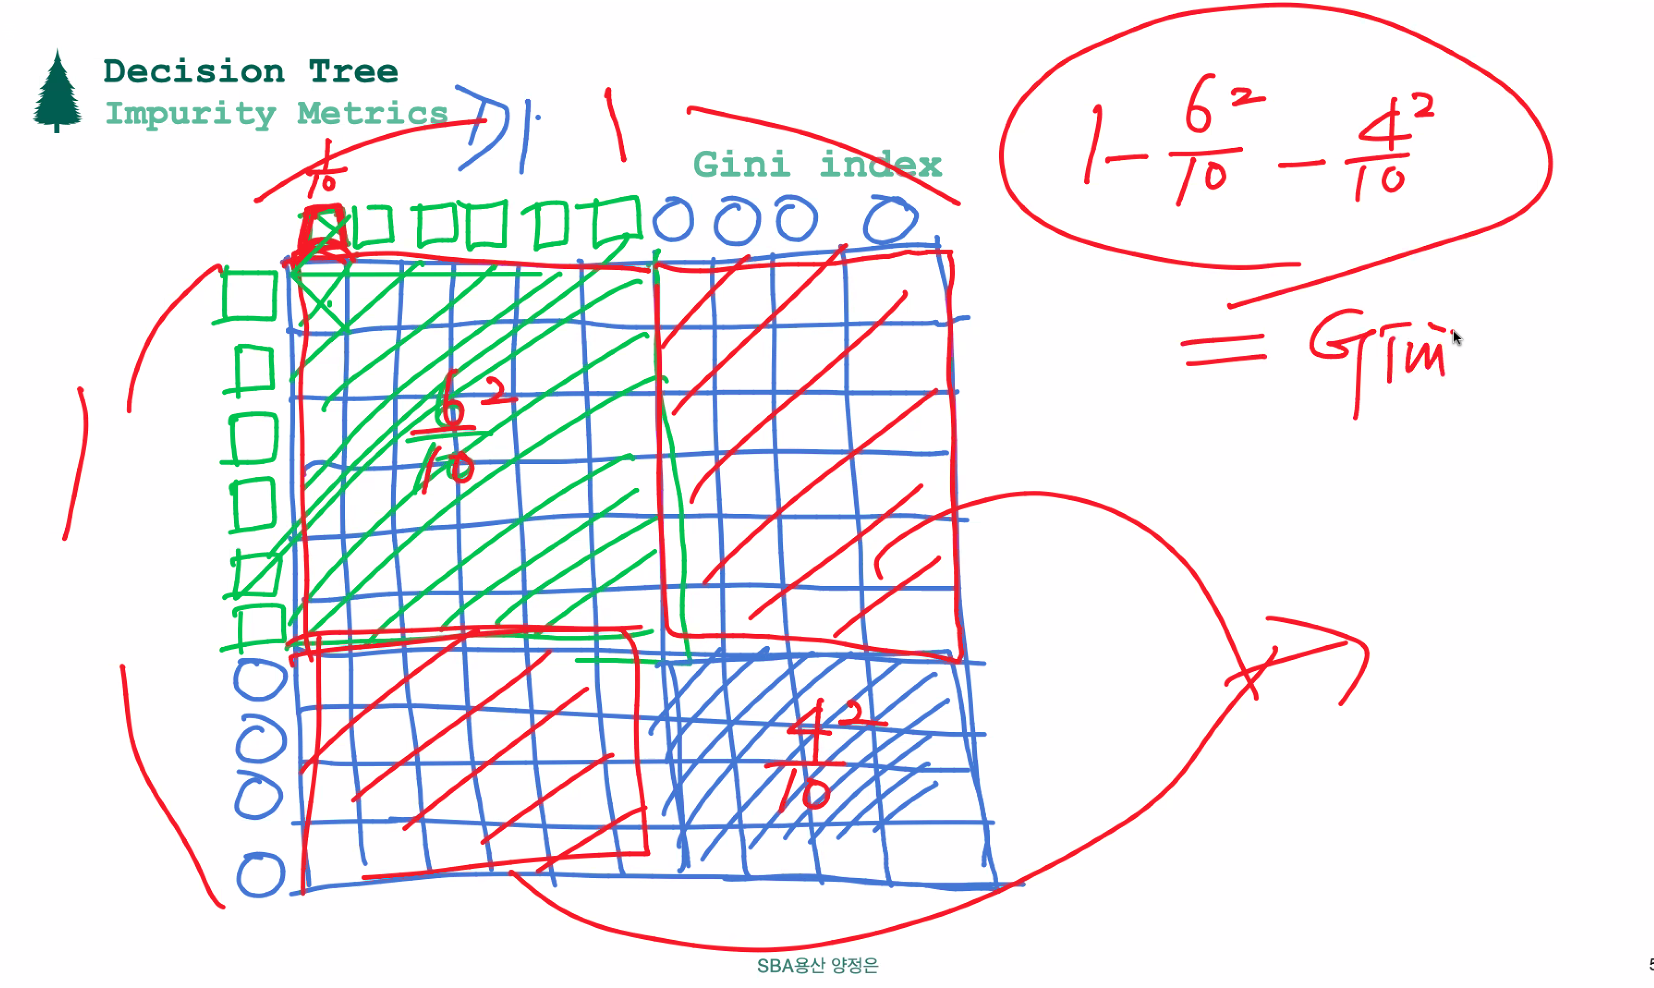
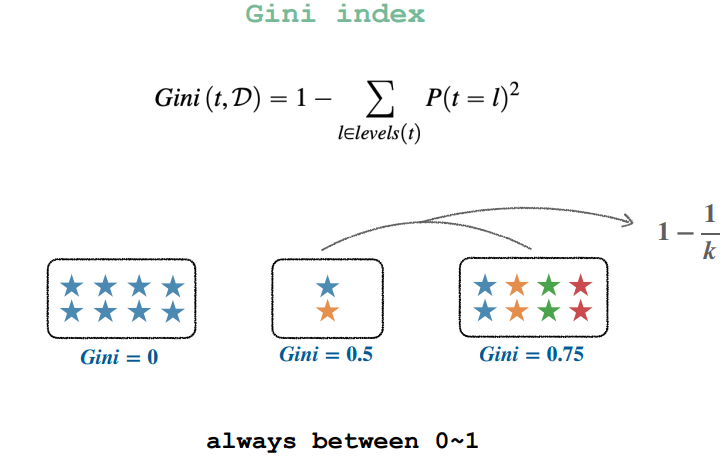

In [72]:
1-(1/2)**2*2

0.5

In [71]:
1-(1/4)**2*4

0.75

#### Gini Index 계산해서 Decision tree 그리기
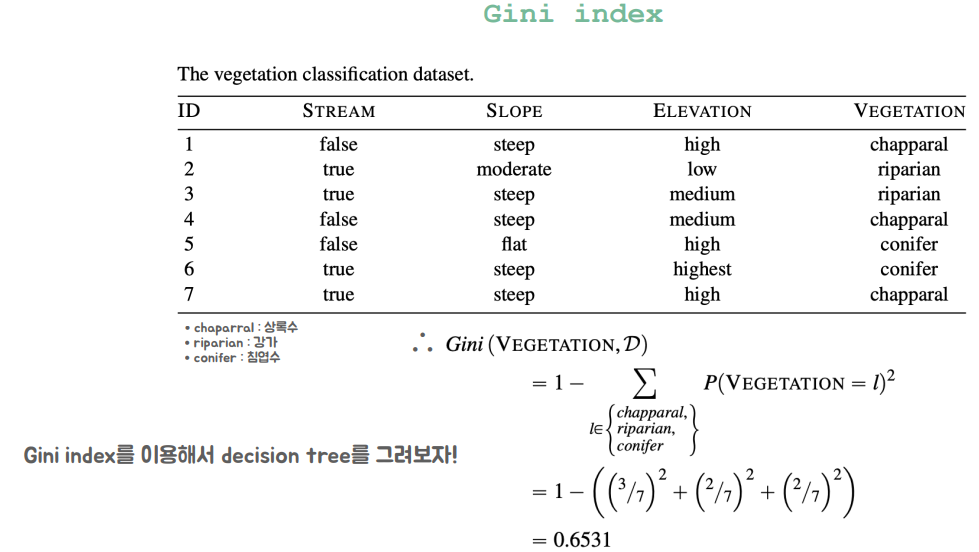

In [79]:
GI=1-(3/7)**2-(2/7)**2*2

In [80]:
#stream
#True
t=1-(2/3)**2-(1/3)**2
#False
f=1-(1/2)**2-(1/4)**2*2
St=t*3/7+f*4/7
GI-St

0.1054421768707483

In [81]:
#slope
#flat
f=0
#moderat
m=0
#steep
s=1-(3/5)**2-(1/5)**2*2
Sl=f*1/7+m*1/7+5/7*s
GI-Sl

0.25306122448979596

In [77]:
#elevation
#low
l=0
#highest
t=0
#high
h=1-(2/3)**2-(1/3)**2
#medium
m=1-(1/2)**2*2
El=l*1/7+t*1/7+h*3/7+m*2/7
GI-El

0.3197278911564626

In [83]:
#dataset 1,5,7의 GI
1-(2/3)**2-(1/3)**2

0.4444444444444445

In [84]:
#dataset 1,5,7의 stream
f=1-(1/2)**2*2
t=0
f*2/3+t*1/3

0.3333333333333333

In [ ]:
#dataset 1,5,7의 slope
f=0
m=0
s=0